In [1]:
# import all libraries here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import joblib

In [4]:
# loading the complete and abridged dataframes

df = joblib.load('../data/jlib_files/dataframes/modelling_df_1_cleaning.jlib')
df_vis = joblib.load('../data/jlib_files/dataframes/complete_df_1_cleaning.jlib')

To-Do List

EDA:

- scatterplot/geographical visualisation showing where houses/apartments are located (to understand why apartments cost more than houses)
- bar plot showing which TFL zones have more apartments/houses for the same reasons as above

- median price comparison for binary variables
- pairplots for continuous data
- masked heatmap to check for co-correlation
- timeseries visualisations - off-topic but could be interesting as a result of Covid impact on 2020

Variable Transformation:

- look at distributions of continuous/discrete variables - do they need transforming?
- look in to log transforming the continuous variables (naive-Bayes lessons)

Modelling:

- review the use of NLP - could we instead look at key words within the variables? This might be a better option for the title variable
- can we use neural networks?

good visualisations: https://towardsdatascience.com/predicting-airbnb-prices-with-deep-learning-part-2-how-to-improve-your-nightly-price-50ea8bc2bd29

# Exploratory Data Analysis

### Histogram distributions of quantitative variables 

In [12]:
columns = list(df_vis.columns)

columns

['id',
 'listing_url',
 'name',
 'description',
 'neighborhood_overview',
 'host_id',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'instant_bookable',
 'calculated_host_listings_count',
 'property_type_basic',
 'air_conditioning',
 'bbq',
 'baby_facilities',
 'balcony_or_patio',
 'bath',
 'bed_linen',
 'cable_tv',
 'child_friendly',
 'coffee_maker',
 'cooking_facilities',
 'dishwasher',
 'fridge_freezer',
 'garden',
 'has_workspace',
 'host_greets_you',
 'long_term_stays',
 'luggage_dropoff',
 'lock_on_bedroom_door',
 'luxury_facilities',
 'private_entrance',
 'toiletries',
 'tumble_dryer',
 'tv',
 'distance_from_center',
 'nearest_station',
 'station_distance',
 'rail_network',
 'tfl_zone',
 'postcode',
 'mean_monthly_r

In [15]:
describe_variables = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'calculated_host_listings_count',
                     'distance_from_center', 'station_distance', 'mean_monthly_rent', 'name_length',
                     'description_length', 'neighborhood_overview_length', 'host_about_length']

df[describe_variables].describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,73364.0,3.002522,1.916181,1.000000,2.000000,2.000000,4.000000,16.000000
bathrooms,73364.0,1.306901,0.606317,0.500000,1.000000,1.000000,1.500000,18.000000
bedrooms,73364.0,1.015362,0.170620,1.000000,1.000000,1.000000,1.000000,16.000000
beds,73364.0,1.712093,1.228469,1.000000,1.000000,1.000000,2.000000,38.000000
price,73364.0,105.941143,126.989944,20.000000,39.000000,70.000000,122.000000,1000.000000
calculated_host_listings_count,73364.0,28.106128,111.625202,1.000000,1.000000,1.000000,4.000000,861.000000
distance_from_center,73364.0,7.241909,4.493219,0.017436,4.148304,6.086199,9.455120,29.311408
station_distance,73364.0,0.725411,0.919740,0.001587,0.290835,0.470464,0.768426,11.349528
mean_monthly_rent,73364.0,1471.515909,311.658425,859.000000,1282.000000,1461.000000,1633.000000,2611.000000
name_length,73364.0,6.466073,2.029768,0.000000,5.000000,7.000000,8.000000,45.000000


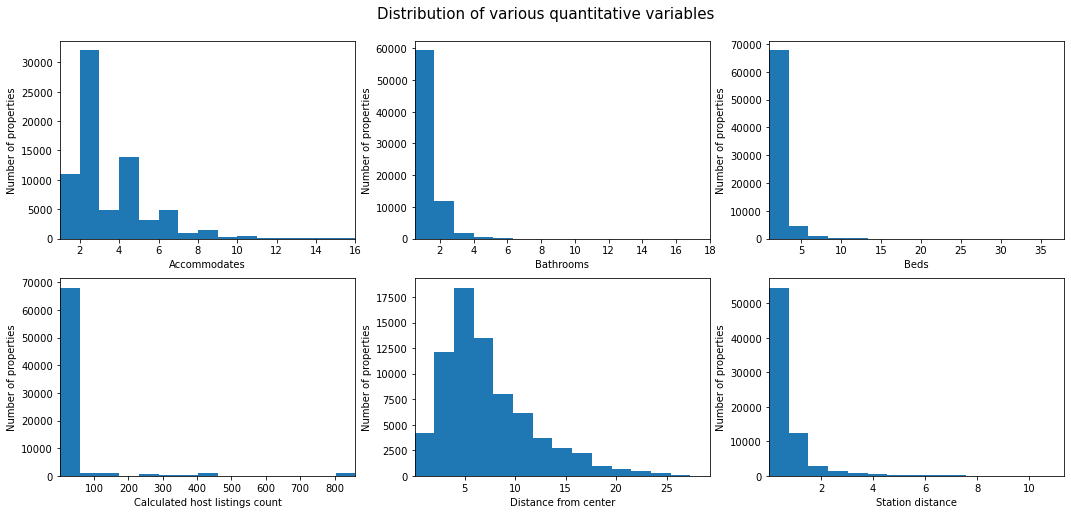

In [7]:
quantitative_variables = ['accommodates', 'bathrooms', 'beds', 'calculated_host_listings_count',
                         'distance_from_center', 'station_distance']

fig,ax = plt.subplots(2, 3, figsize=(18,8))

counter = 0

for r in range(2):
    for c in range(3):
        
        column = quantitative_variables[counter]
        title = column.replace('_',' ').capitalize()
        
        ax[r,c].hist(df[column], bins=15)
        
        ax[r,c].set_xlabel(title)
        ax[r,c].set_ylabel('Number of properties')
        ax[r,c].margins(x=0)
        
        counter += 1

plt.suptitle('Distribution of various quantitative variables', y=0.94, size=15)
plt.show()

- horizontal histograms showing difference in price between room types and property types

additions - colour the bars differently to differentiate

In [81]:
colors = ['r', 'b', 'g', 'y']

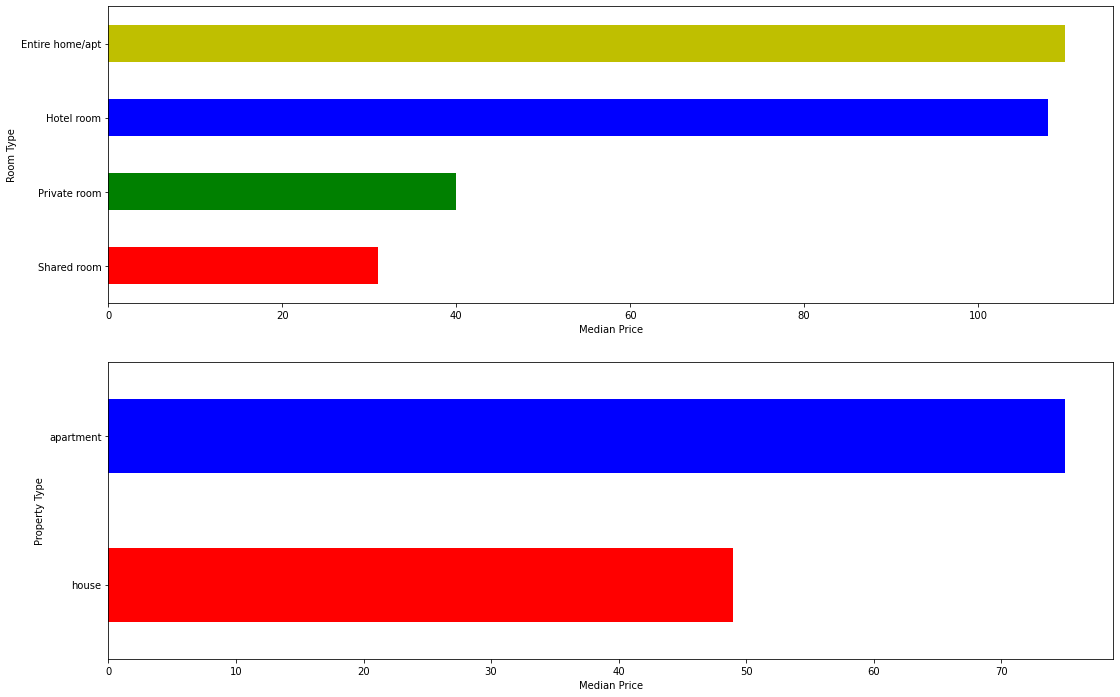

In [101]:
fig,ax = plt.subplots(2, figsize = (18,12))

df_vis.groupby('room_type').median()['price'].sort_values().plot.barh(ax=ax[0], ylabel='Room Type',
                                                                      color = ['r','g','b','y'])
df_vis.groupby('property_type_basic').median()['price'].sort_values().plot.barh(ax=ax[1], ylabel='Property Type',
                                                                               color = ['r', 'b'])

ax[0].set_ylabel('Room Type')
ax[1].set_ylabel('Property Type')

ax[0].set_xlabel('Median Price')
ax[1].set_xlabel('Median Price')

plt.show()

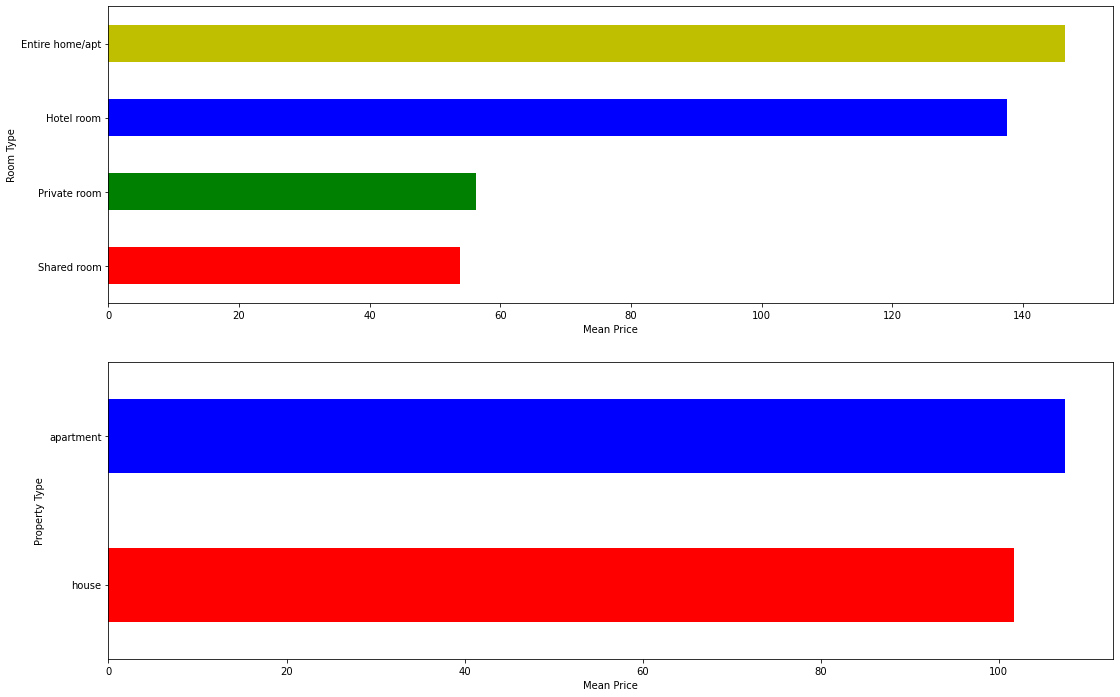

In [163]:
fig,ax = plt.subplots(2, figsize = (18,12))

df_vis.groupby('room_type').mean()['price'].sort_values().plot.barh(ax=ax[0], ylabel='Room Type',
                                                                      color = ['r','g','b','y'])
df_vis.groupby('property_type_basic').mean()['price'].sort_values().plot.barh(ax=ax[1], ylabel='Property Type',
                                                                               color = ['r', 'b'])

ax[0].set_ylabel('Room Type')
ax[1].set_ylabel('Property Type')

ax[0].set_xlabel('Mean Price')
ax[1].set_xlabel('Mean Price')

plt.show()

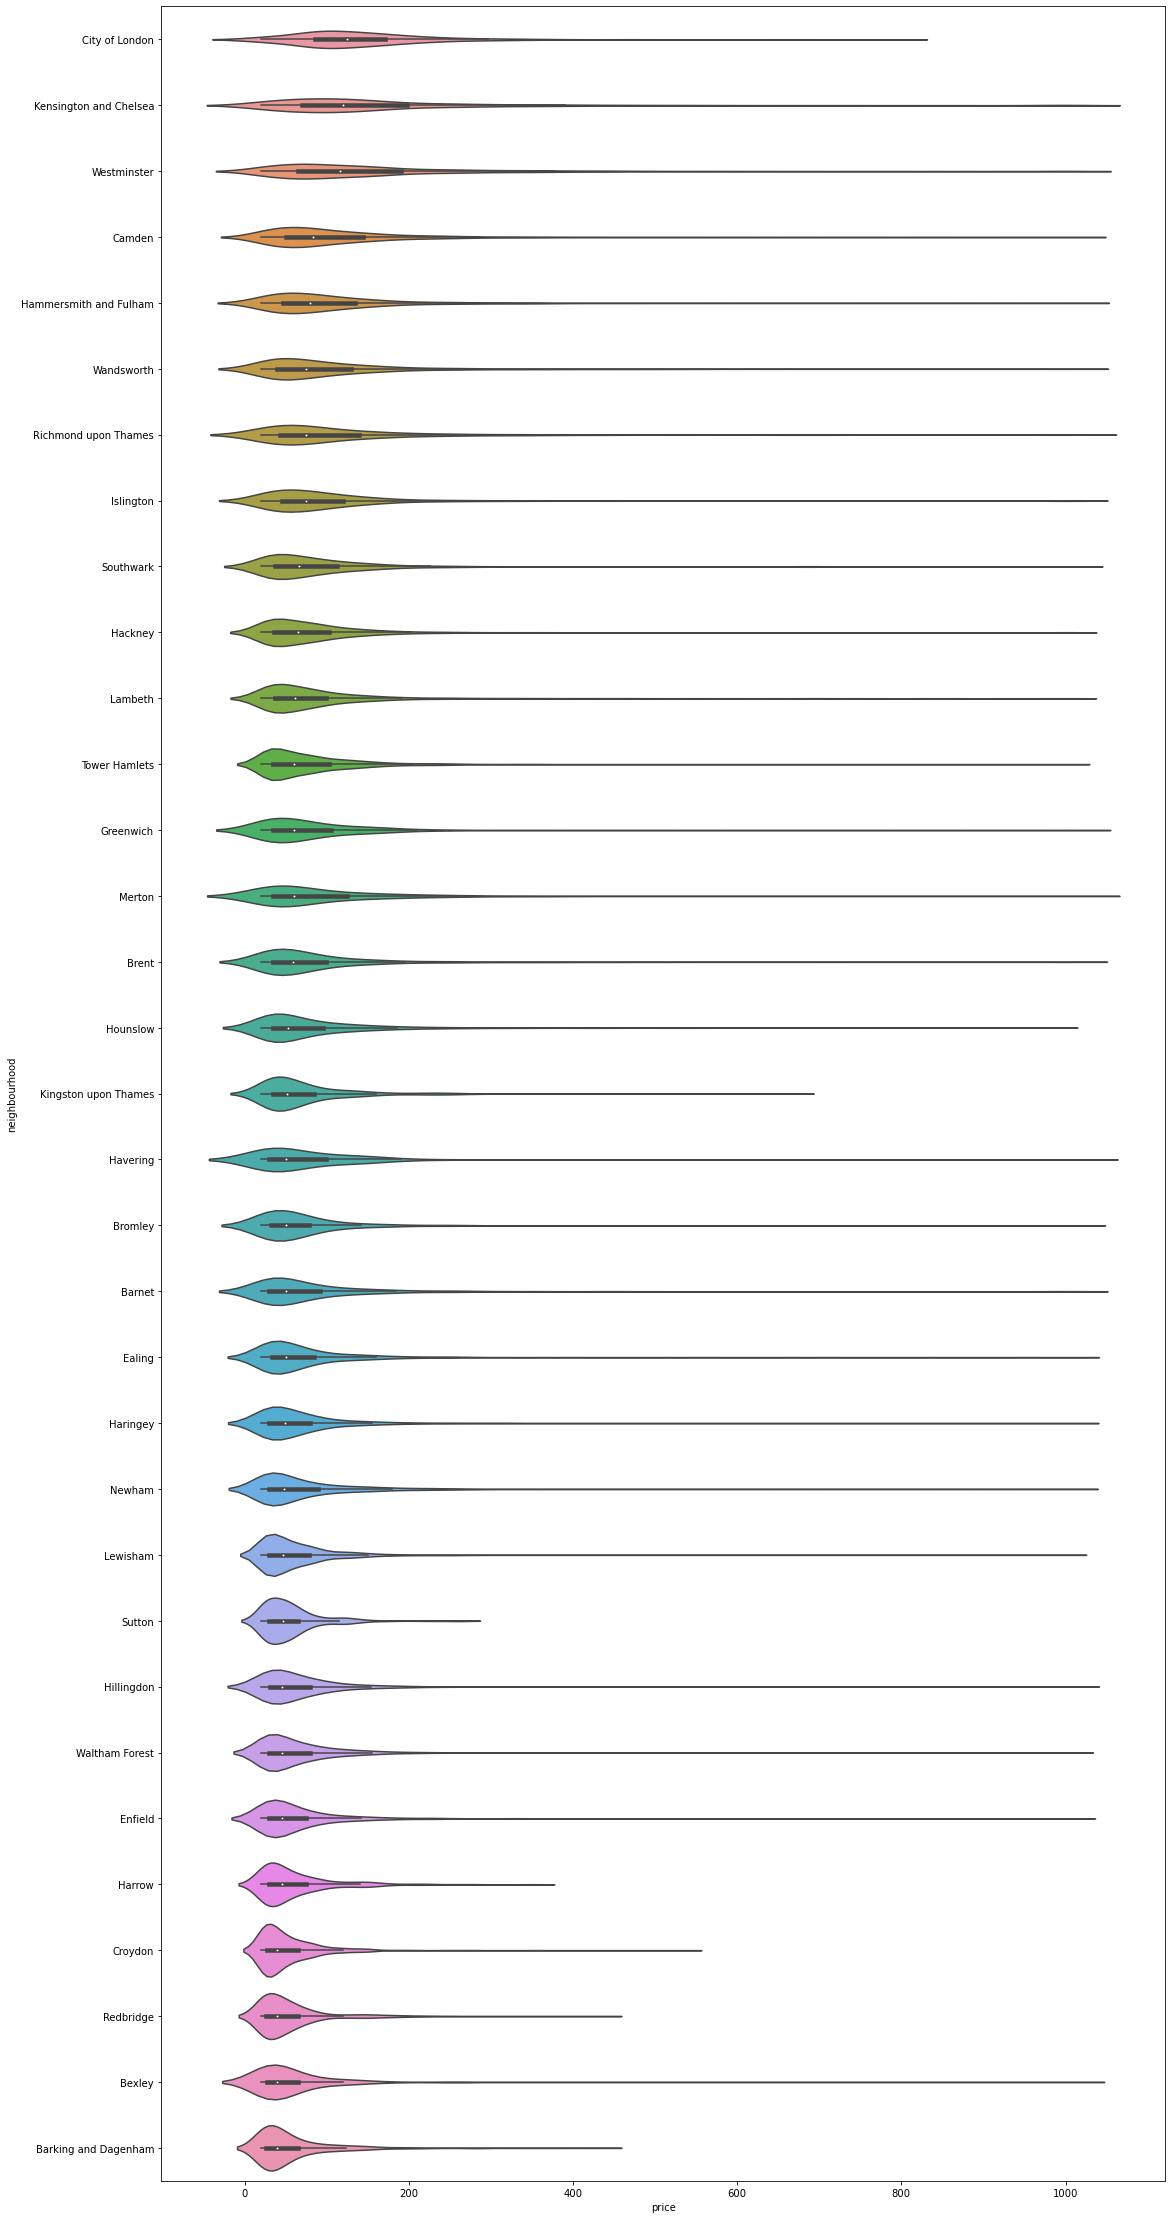

In [133]:
fig,ax = plt.subplots(figsize=(18,40))

neighbourhood_order = df_vis.groupby('neighbourhood').median()['price'].sort_values(ascending=False).index

sns.violinplot(x=df_vis.price,y=df_vis.neighbourhood,order = neighbourhood_order, ax=ax)

plt.show()

In [152]:
df_vis['tfl_zone_object'] = df_vis.tfl_zone.astype('object')

In [157]:
df_vis['tfl_zone_object'] = df_vis.tfl_zone_object.apply(lambda x: 'Zone ' + str(x))

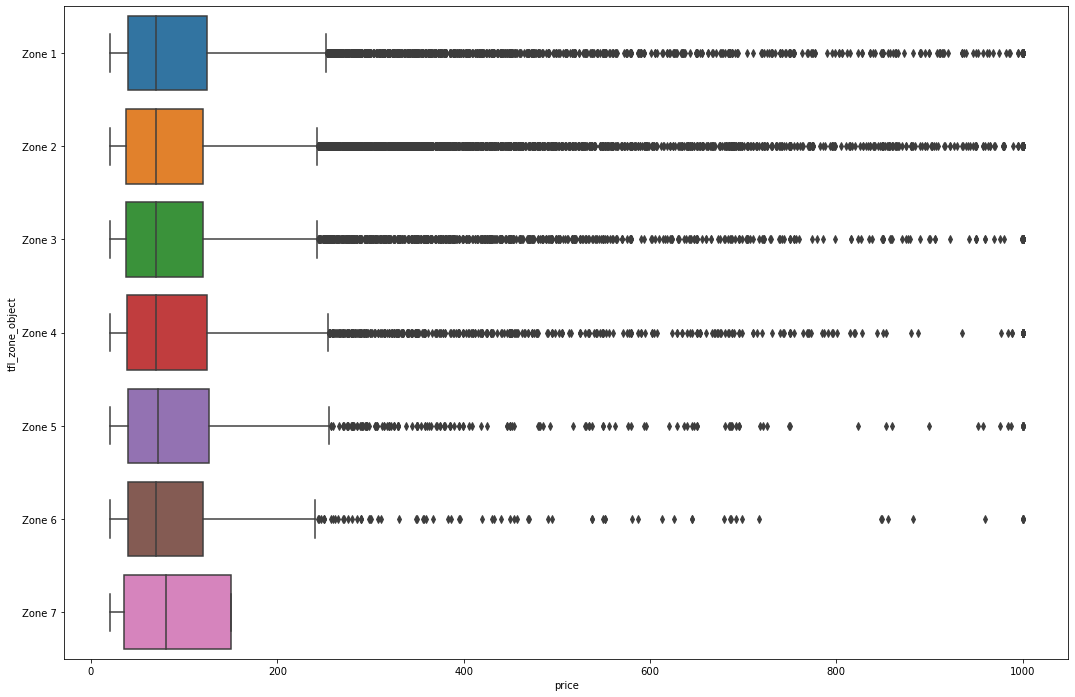

In [192]:
fig,ax = plt.subplots(figsize=(18,12))

tfl_order = sorted(df_vis.tfl_zone_object.unique())

sns.boxplot(x='price', y='tfl_zone_object', data=df_vis, order=tfl_order)

plt.show()

In [104]:
df_vis.dtypes[df_vis.dtypes!='object']

id                                  int64
host_id                             int64
host_is_superhost                   int64
host_has_profile_pic                int64
host_identity_verified              int64
latitude                          float64
longitude                         float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
price                             float64
instant_bookable                    int64
calculated_host_listings_count      int64
air_conditioning                    int64
bbq                                 int64
baby_facilities                     int64
balcony_or_patio                    int64
bath                                int64
bed_linen                           int64
cable_tv                            int64
child_friendly                      int64
coffee_maker                        int64
cooking_facilities                

In [105]:
variables_continuous = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'distance_from_center', 'station_distance',
                       'tfl_zone', 'mean_monthly_rent', 'name_length', 'description_length',
                       'neighborhood_overview_length', 'host_about_length']

In [106]:
mask = np.zeros_like(df_vis[variables_continuous+['price']].corr())

In [107]:
mask[np.triu_indices_from(mask)] = True

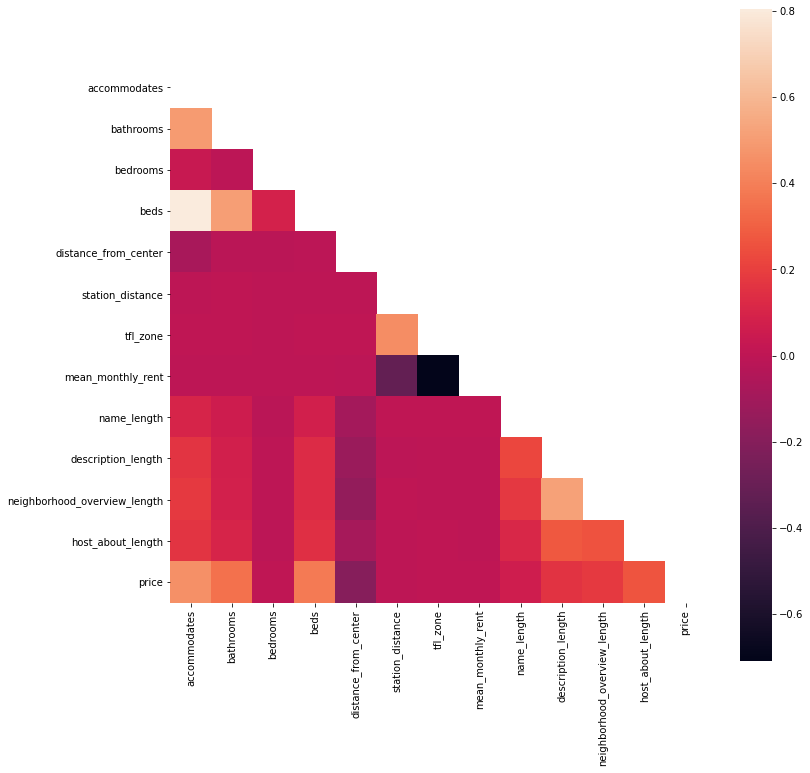

In [108]:
plt.figure(figsize=(12,12))


sns.heatmap(df_vis[variables_continuous+['price']].corr(), mask=mask,square=True)

plt.show()

Why are there such expensive private rooms on Airbnb?

Some of them must be priced as a joke!.....

e.g. https://www.airbnb.com/rooms/10475894

In [109]:
tfl_zones = list(df_vis.tfl_zone.unique())

tfl_zones.sort()

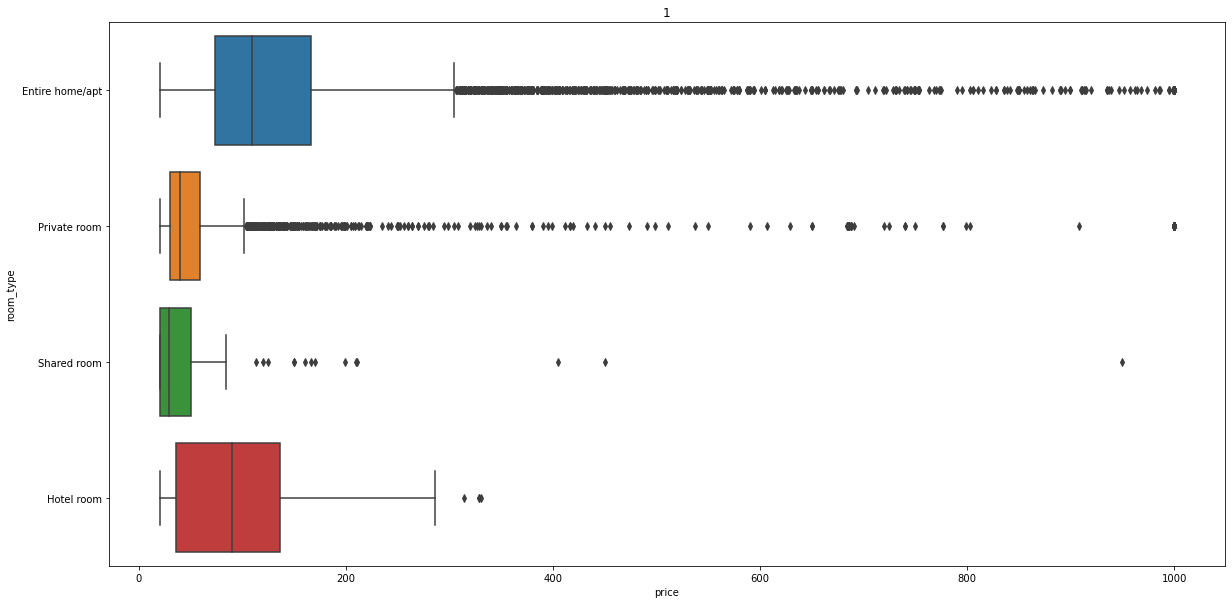

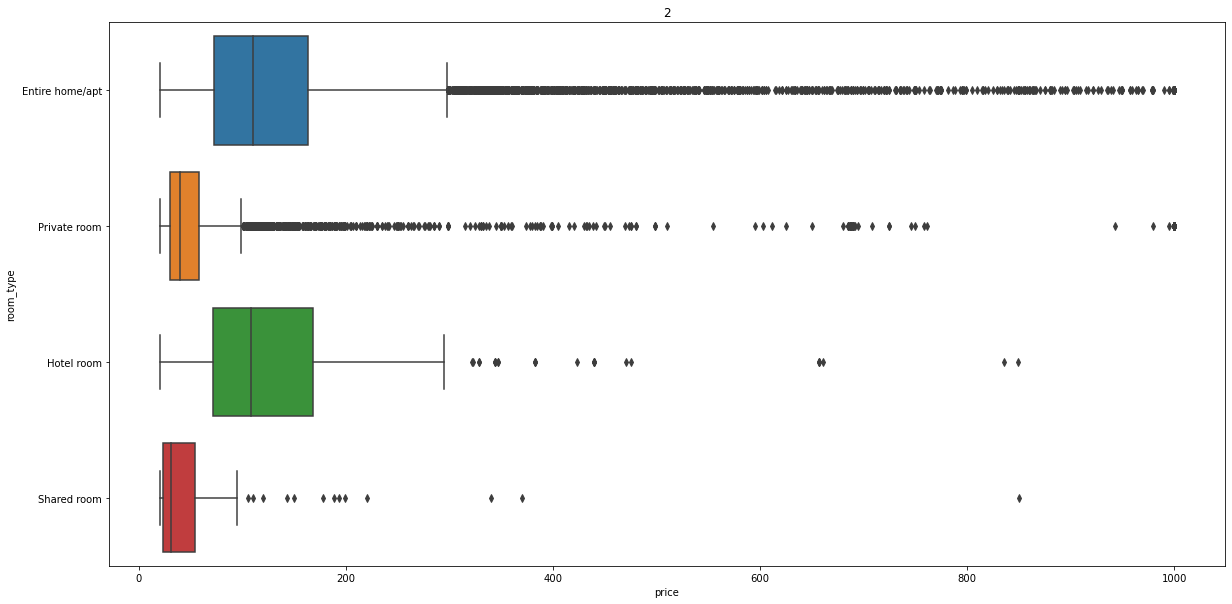

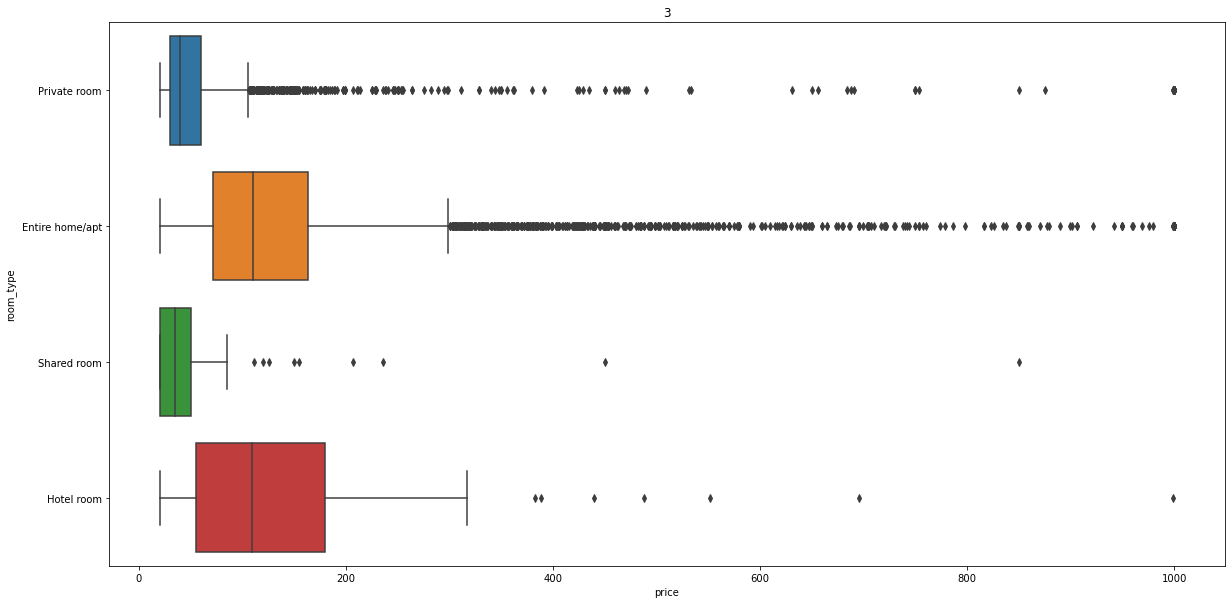

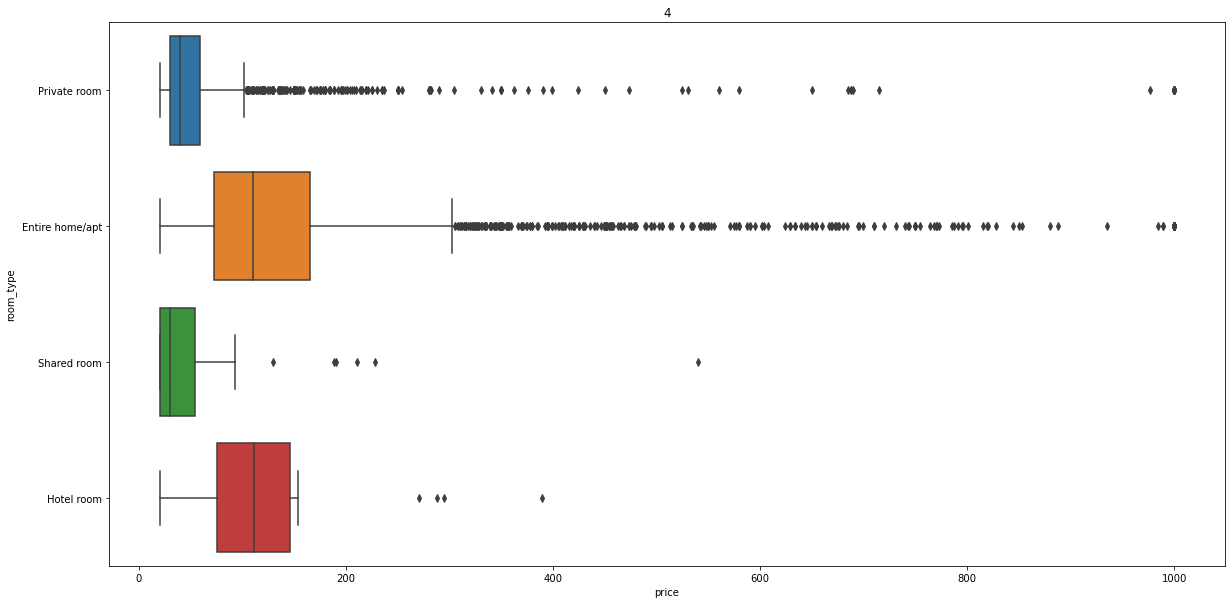

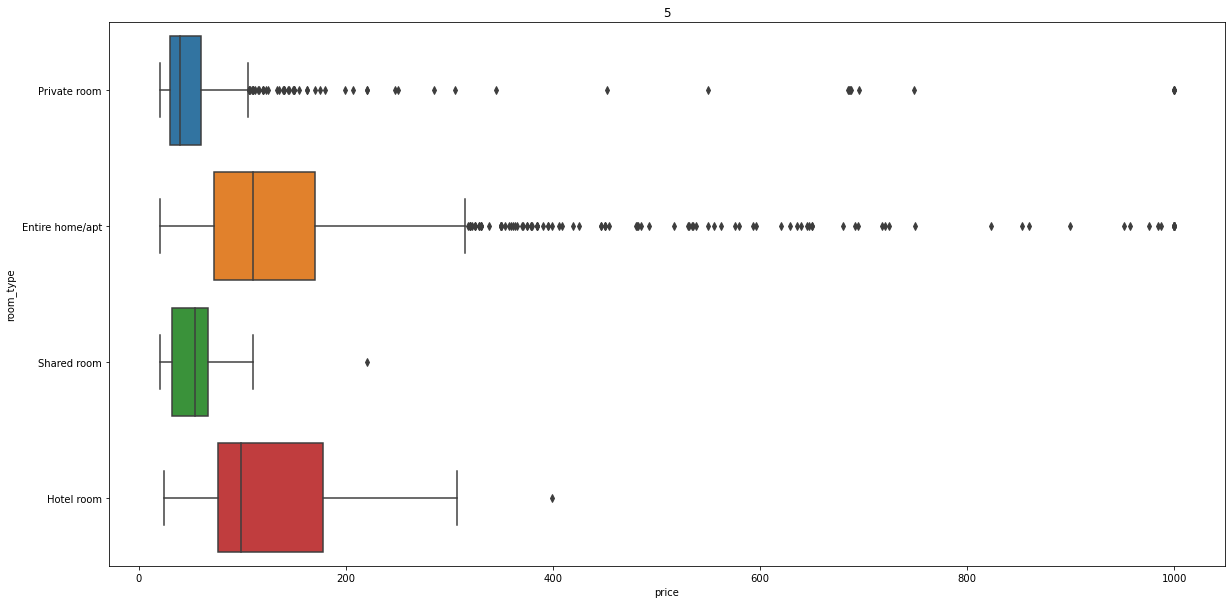

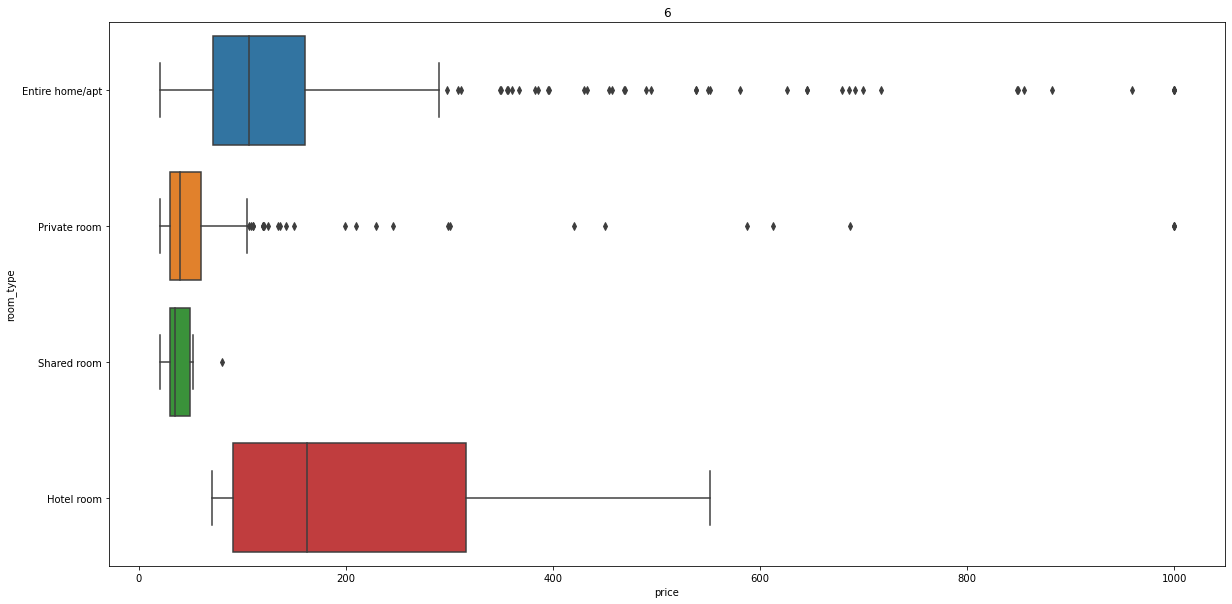

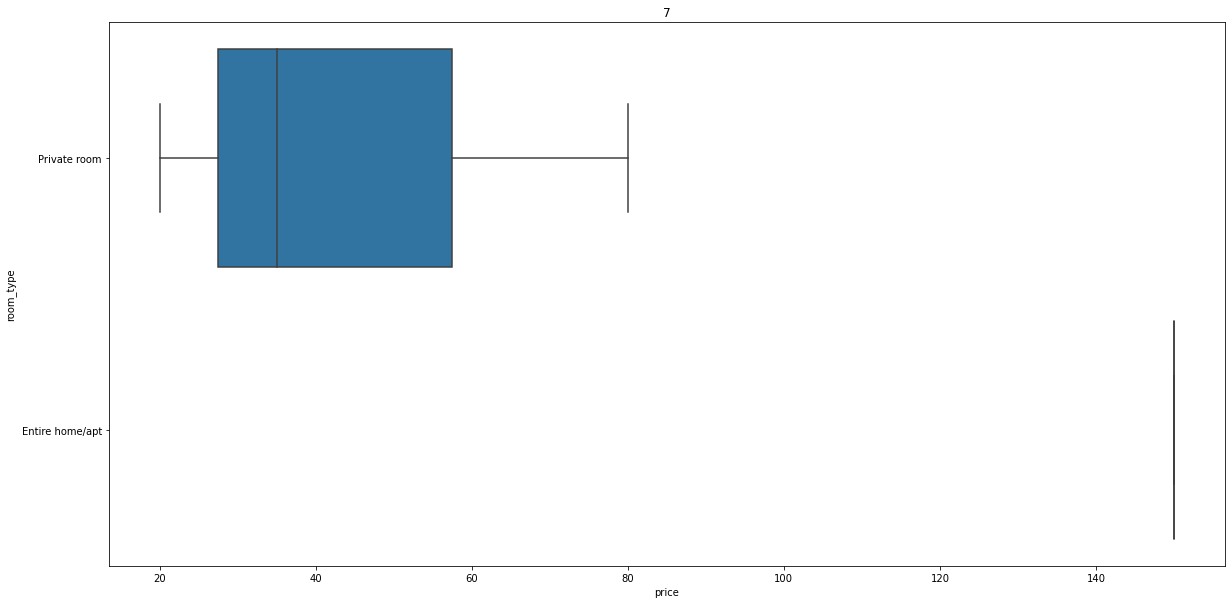

In [110]:
for zone in tfl_zones:
    
    df_vis_zone = df_vis[df_vis.tfl_zone==zone]
    
    fig,ax = plt.subplots(figsize=(20,10))
    sns.boxplot(x=df_vis_zone.price,y=df_vis_zone.room_type,ax=ax,)
    ax.set_title(zone)

plt.show()

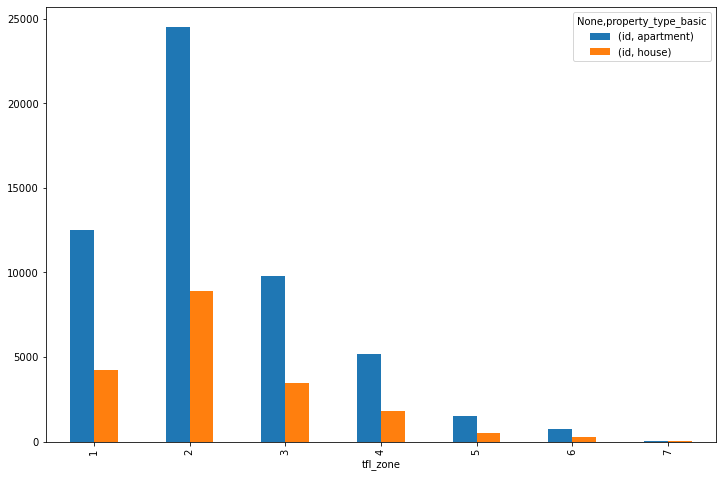

In [123]:
fig,ax = plt.subplots(figsize=(12,8))

df_vis.groupby(['tfl_zone','property_type_basic']).count()[['id']].unstack().plot.bar(ax=ax)

plt.show()

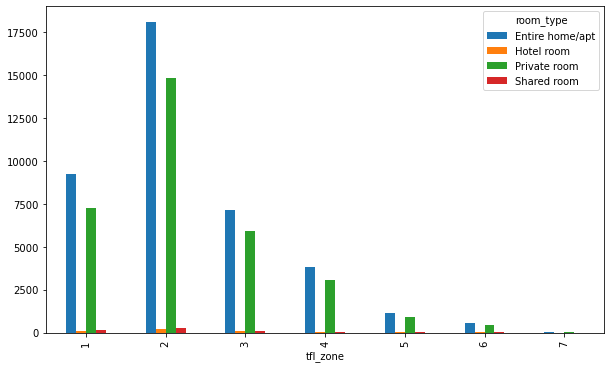

In [112]:
fig,ax=plt.subplots(figsize=(10,6))

df_vis.groupby(['tfl_zone','room_type']).count().listing_url.unstack().plot.bar(ax=ax)

plt.show()

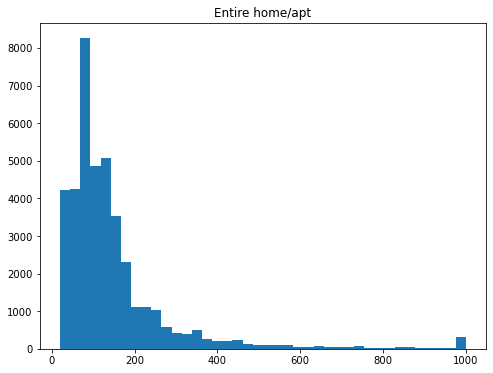

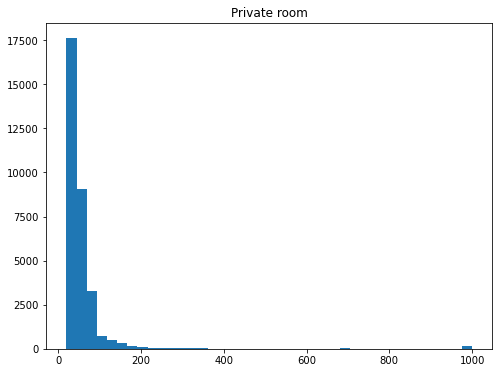

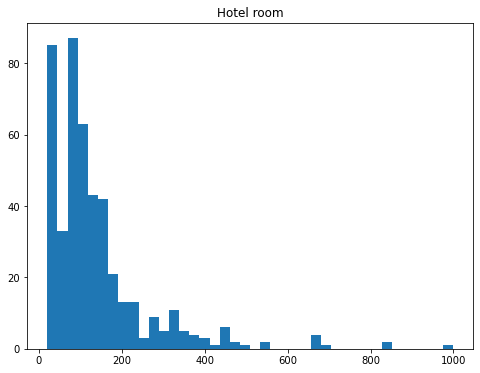

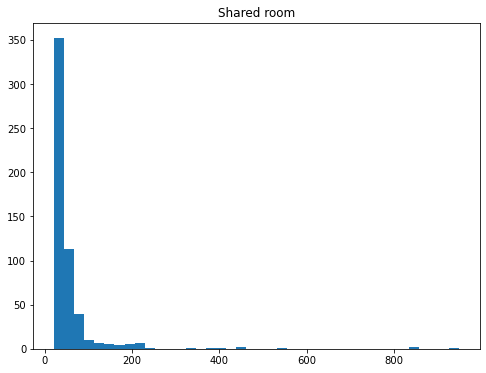

In [113]:
room_types = list(df_vis.room_type.unique())

for room in room_types:
    fig,ax = plt.subplots(figsize=(8,6))

    ax.hist(x=df_vis[df_vis.room_type==room].price, bins=40)
    ax.set_title(room)

plt.show()

## GeoPandas

In [114]:
import geopandas as gpd

In [115]:
map_df_vis = gpd.read_file('../data/neighbourhoods.geojson')
map_df_vis.head()

,neighbourhood,neighbourhood_group,geometry
0,Kingston upon Thames,None,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51..."
1,Croydon,None,"MULTIPOLYGON (((-0.06402 51.31864, -0.06407 51..."
2,Bromley,None,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2..."
3,Hounslow,None,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51..."
4,Ealing,None,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51..."


In [116]:
# Dropping the empty column
map_df_vis.drop('neighbourhood_group', axis=1, inplace=True)

# Creating a dataframe of listing counts and median price by borough
neighbourhood_df_vis = pd.DataFrame(df_vis.groupby('neighbourhood').size())
neighbourhood_df_vis.rename(columns={0: 'number_of_listings'}, inplace=True)
neighbourhood_df_vis['mean_price'] = df_vis.groupby('neighbourhood').price.mean().values

# Joining the dataframes
neighbourhood_map_df_vis = map_df_vis.set_index('neighbourhood').join(neighbourhood_df_vis)

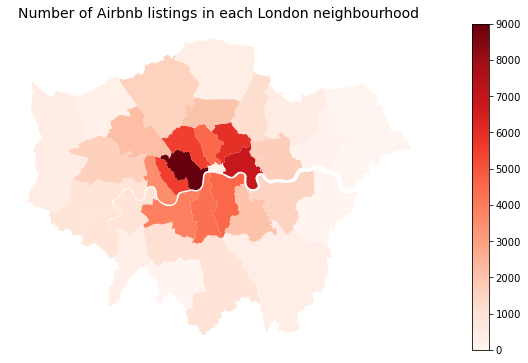

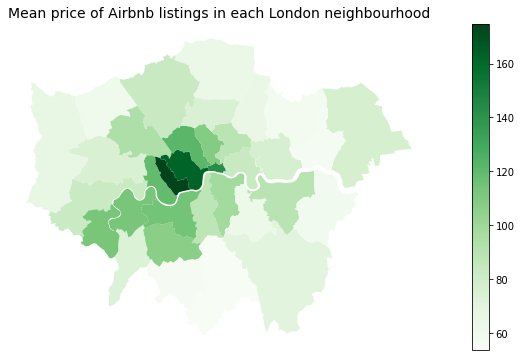

In [117]:
# Plotting the number of listings in each borough
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
neighbourhood_map_df_vis.plot(column='number_of_listings', cmap='Reds', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each London neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Plotting the mean price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
neighbourhood_map_df_vis.plot(column='mean_price', cmap='Greens', ax=ax2)
ax2.axis('off')
ax2.set_title('Mean price of Airbnb listings in each London neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=min(neighbourhood_map_df_vis.mean_price), vmax=max(neighbourhood_map_df_vis.mean_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

credit for the code above to https://github.com/L-Lewis/Airbnb-neural-network-price-prediction/blob/master/Airbnb-price-prediction.ipynb

### Pairplots

In [118]:
df_vis_corr = pd.DataFrame(df_vis.corr()['price'])

df_vis_corr['av_correlation'] = df_vis_corr.price.apply(lambda x: abs(x))

df_vis_corr.sort_values('av_correlation', ascending=False).head(50)

,price,av_correlation
price,1.000000,1.000000
accommodates,0.456823,0.456823
beds,0.384702,0.384702
calculated_host_listings_count,0.357780,0.357780
bathrooms,0.353838,0.353838
host_about_length,0.261553,0.261553
dishwasher,0.238346,0.238346
distance_from_center,-0.196195,0.196195
tv,0.188746,0.188746
neighborhood_overview_length,0.178647,0.178647


In [119]:
pairplot = df_vis[['beds', 'mean_monthly_rent', 'accommodates',
       'bathrooms', 'bedrooms','price', 'tfl_zone', 'room_type']].copy()

/Users/jamesradford/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


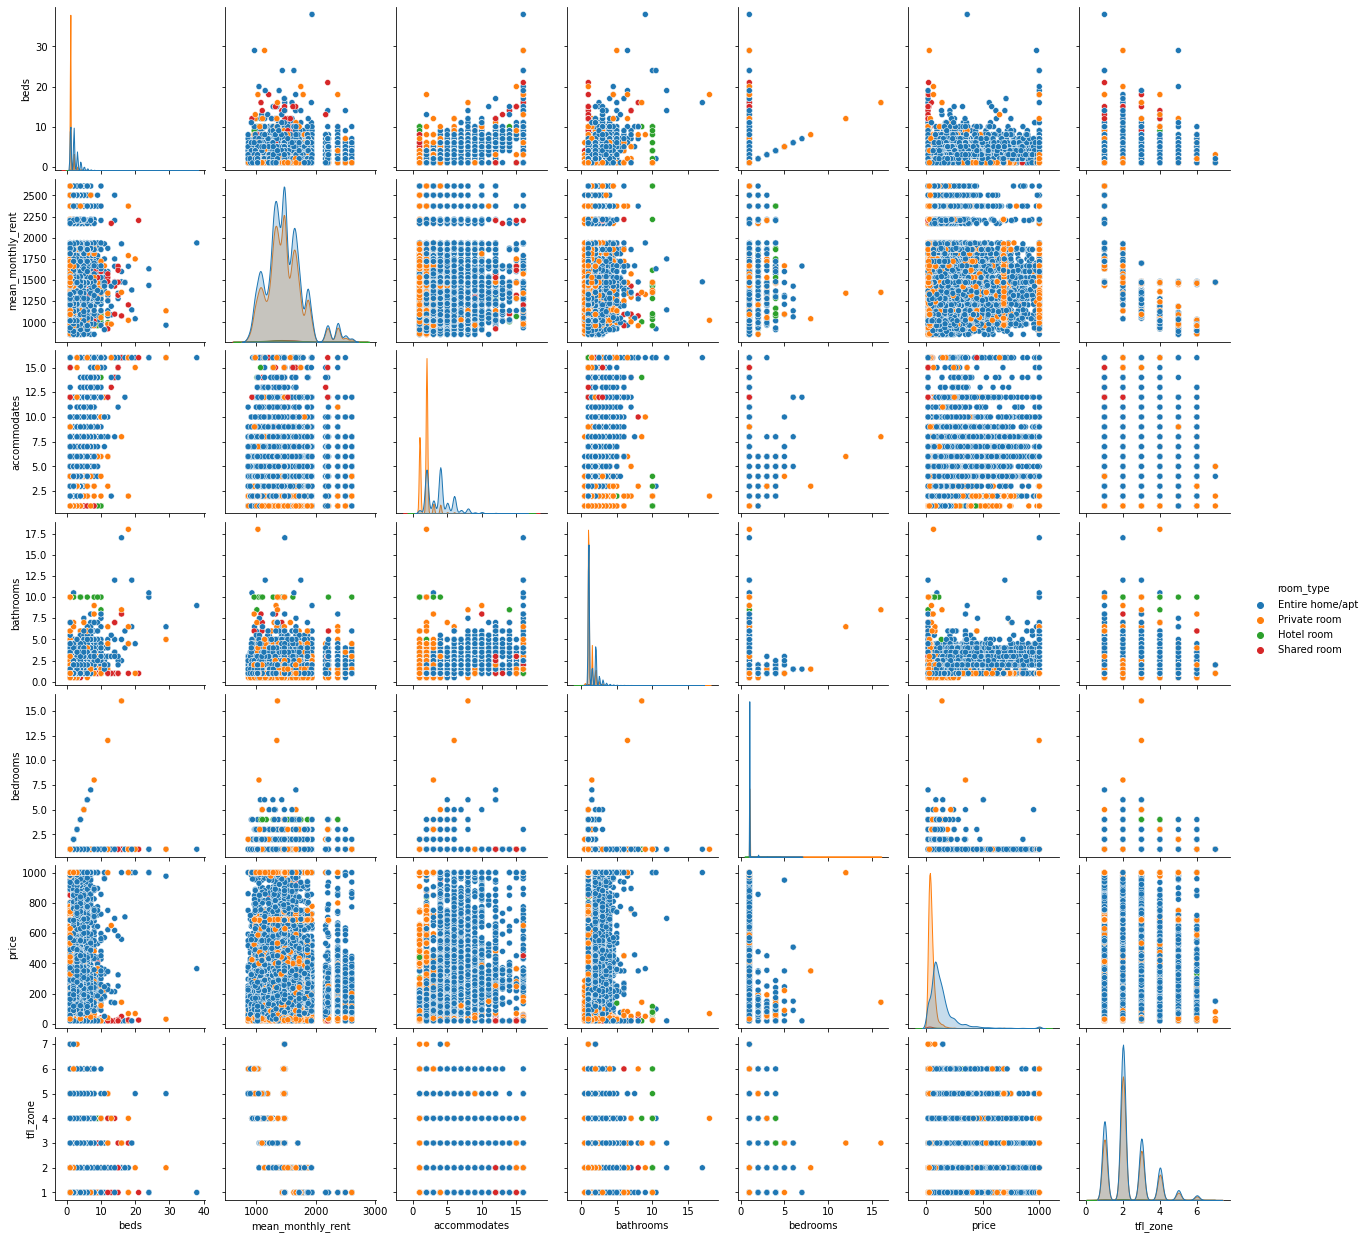

In [120]:
sns.pairplot(pairplot,hue='room_type')

plt.show()